In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("../")

%matplotlib inline
import matplotlib.pylab as plt
# pylab.rcParams['figure.figsize'] = (10, 5)

In [2]:
from ld_gan import visualize
import numpy as np
import ld_gan
import sklearn

# load data

In [3]:
X, Y = ld_gan.data_proc.data_loader.load_data(1, verbose=1, resize = 64)

100%|██████████| 102/102 [00:10<00:00, 12.15it/s]

load data from '/export/home/oblum/projects/ls_gan/data/flowers_102/jpg_128'


In [4]:
yc = np.argmax(Y, axis = 1)

In [5]:
from ld_gan.train_ops.triplet_enc import get_enc_space_suggestion, get_dis_score_from_z

In [36]:
project = "xf_11111_s10l.py"
epoch = 50 

enc = ld_gan.utils.model_handler.load_model(project, epoch, 'enc')
gen = ld_gan.utils.model_handler.load_model(project, epoch, 'gen')
dis = ld_gan.utils.model_handler.load_model(project, epoch, 'dis')

loaded model 'projects/xf_11111_s10l.py/model/e_0050.pth'
loaded model 'projects/xf_11111_s10l.py/model/g_0050.pth'
loaded model 'projects/xf_11111_s10l.py/model/d_0050.pth'


In [37]:
z_all = ld_gan.utils.model_handler.apply_model(enc, X, 1000)

In [38]:
z_anc = np.array([z_all[14]])

In [39]:
ds = get_dis_score_from_z(z_anc, z_all[:10], gen, dis)

<Container object of 7 artists>

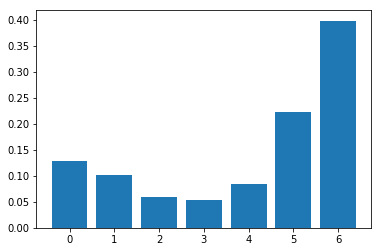

In [40]:
plt.bar(range(len(ds)), ds)

In [34]:
a = ds[:,0]

IndexError: too many indices for array

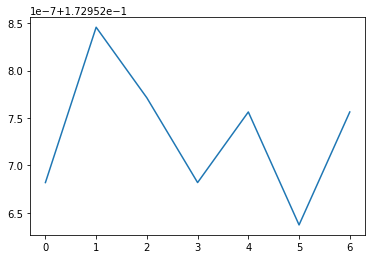

In [35]:
plt.plot(range(len(a)), a)

In [28]:
a

array([ 0.17295268,  0.17295285,  0.17295277,  0.17295268,  0.17295276,
        0.17295264,  0.17295276], dtype=float32)

# show

In [ ]:
def show_dis_score_decission(project, 
                             epoch,
                             imgs, 
                             anchor_img_idx=None, 
                             n_pos = 10,
                             n_neg = 10,
                             quantile_pos = 0.05, 
                             quantile_neg = 0.3
                             n_neighbors=5):

    from ld_gan.train_ops.triplet_enc import get_enc_space_suggestion
    
    enc = ld_gan.utils.model_handler.load_model(project, epoch, 'enc')
    gen = ld_gan.utils.model_handler.load_model(project, epoch, 'gen')
    dis = ld_gan.utils.model_handler.load_model(project, epoch, 'dis')
    
    z_all = ld_gan.utils.model_handler.apply_model(enc, imgs, 1000)
    z_anc = z_all[anchor_img_idx]
    
    idxs_pos, idxs_neg = get_enc_space_suggestion(z_anc, 
                                                  z_all, 
                                                  n_pos = n_pos,
                                                  n_neg = n_neg,
                                                  quantile_pos = quantile_pos, 
                                                  quantile_neg = quantile_neg)
    
    
    
    
    
    path = os.path.join("projects", project, "model")
    epochs = sorted([int(g[2:6]) for g in os.listdir(path) if "g_" in g])
    
    if base_img_idx is None:
        base_img_idx = np.random.randint(0, len(imgs)-1, 1)
    else:
        base_img_idx = [base_img_idx]
        
    base_img = imgs[base_img_idx]
    disp(base_img, figsize=(6,2))
    
    for epoch in epochs:
        
        enc = ld_gan.utils.model_handler.load_model(project, epoch, 'enc')
        z_all = ld_gan.utils.model_handler.apply_model(enc, imgs, 1000)
        z_base = z_all[base_img_idx]

        dists = sklearn.metrics.pairwise_distances(z_all, z_base)
        dists = np.squeeze(dists)
        idxs = np.argsort(dists)[1:n_neighbors+1]
        
        nn_imgs = imgs[idxs]
        
        disp(nn_imgs, figsize=(6,2))